# Pandas Cookbook  

## First a word on filepaths : Absolute vs Relative   

- The Absolute path is the full path to some place on your computer.   
- The Relative path is the path to some file with respect to your current working directory (PWD).    

For example:-

Absolute path: C:/users/admin/docs/stuff.txt  <-- use this always, don't be lazy!!!

If my PWD is C:/users/admin/, then the relative path to stuff.txt would be: docs/stuff.txt  

## Loading files
- Warning makign column(s)!! an index, makes them immutable!! 

# Big list of Pandas Bugs and errors that will trip you up

1. If you add a column to your data set, make sure you add it even when selecting a df subset of the columns
- This issue caused no errors when refferencing non-existing columns in df subsets in loop itteration
e.g 

```
if you add a column : 'nuDataColumn' , make sure to add it to subset

oldDataset = [['columns1','column3']]
nuDataset = [['columns1','column3','nuDataset']]
```

In [69]:
import pandas as pd
import xlrd
from datetime import datetime

'''Excel Files'''
date_cols = ['date_cc']
df_excel = pd.read_excel(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\Coffee_v1.xlsx',
sheet_name='Coffee')
# Specifying data types
df_excel = pd.read_excel(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\Coffee_v1.xlsx',
sheet_name='Coffee',
dtype = {"image": str,
         "freq": float})


'''CSV Files'''
date_cols = ['date_cc'] # Specifying columns to be treated as datetimes, and passing it to the pandas 
df_csv = pd.read_csv (r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\climate_change.csv',parse_dates=date_cols,
dtype={"co2": float,
"relative_temp": float})

# Specifying index column via column location
medals = pd.read_csv(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\medals_by_country_2016.csv',index_col = 0)  

# Specifying index column via column name

indexColumns = ['ID','Name'] # should n be date columns as this allows you to parse through them easier
summer2016 = pd.read_csv(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\summer2016.csv',index_col = indexColumns)  



## Print columns as a list



In [57]:
import pandas as Pd
data2 = [['julian', 14], ['3096793G009', 33], ['3096793G9', 14]]

# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns = ['Bpn', 'name'])
print('These are the columns:- \n', list(df2.columns))

These are the columns:- 
 ['Bpn', 'name']


## Find column type

In [ ]:
print(df1.column.dtype)

## Formatting Dates  

### Common Errors  
- AttributeError: 'datetime.datetime' object has no attribute 'days' :  for this use  "day" instead of "days".  Don't confuse this with timedelta objects which does have the attribute "days"


In [11]:
# importing pandas as pd
import pandas as pd
  
# Create the Timestamp object
# ts = pd.Timestamp(year = 2015,  month = 10, day = 6,
#            hour = 10, second = 49, tz = 'US/Central')
ts = pd.Timestamp(year = 2015,  month = 10, day = 6)
  
# Print the Timestamp object
print(ts.date())


ts2 =pd.Timestamp("1980-01-01")
print(ts2.date())
print(ts2)


#convert datetime value to simply year-month format e.g  2021-10
df1['DATE'] = df1['DATE'].dt.to_period('M')


2015-10-06
1980-01-01
1980-01-01 00:00:00


## Using condition on a dataframe

In [69]:
# Creating a new Df cleanly using  a condition to get  males, and gymnasts, also specifying  what columns are needed

date_cols = ['Year']
summer2016 = pd.read_csv(r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\summer2016.csv',parse_dates=date_cols)

slicedDf = summer2016.loc[(summer2016.Sex == "M" ) & (summer2016.Sport == "Gymnastics" ),["Sex","Sport"]]

#Reseting the index after obtaining the slice...mainly for ease of viewing
slicedDf.reset_index(drop=True, inplace = True)

print(slicedDf)




   Sex       Sport
0    M  Gymnastics
1    M  Gymnastics
2    M  Gymnastics
3    M  Gymnastics
4    M  Gymnastics
5    M  Gymnastics
6    M  Gymnastics
7    M  Gymnastics
8    M  Gymnastics
9    M  Gymnastics
10   M  Gymnastics
11   M  Gymnastics
12   M  Gymnastics
13   M  Gymnastics
14   M  Gymnastics
15   M  Gymnastics
16   M  Gymnastics
17   M  Gymnastics
18   M  Gymnastics
19   M  Gymnastics
20   M  Gymnastics
21   M  Gymnastics
22   M  Gymnastics
23   M  Gymnastics
24   M  Gymnastics
25   M  Gymnastics
26   M  Gymnastics
27   M  Gymnastics
28   M  Gymnastics
29   M  Gymnastics
30   M  Gymnastics
31   M  Gymnastics
32   M  Gymnastics
33   M  Gymnastics
34   M  Gymnastics
35   M  Gymnastics


## Applying a date condition to a dataframe

- Workign with dates can ve EXTREMELY tricky, and is often one of if not the most trickiest prt to deal with when processing dataframes
- These are the best practices for when dealing with dates in dataframes :-  
    1. make sure ALL date columns are converted to and are recognized as dates by using the "parse dates function" when creating the DF
    2. Ensure that all dates that are to be used in the condition are in PROPER -US Timestamp format i.e YYYY-MM-DD 
    

In [56]:
# US Timestamp format example
import pandas as pd 
exampleFormat = pd.Timestamp(year=2017, month=1, day=26, hour=12)
print(exampleFormat)

2017-01-26 12:00:00


In [71]:
#Parsing dates -  letting python know the date column is made up of "actual dates"
date_cols =  ['date_cc']
df_climateChange = pd.read_csv (r'C:\Users\Burudani\Documents\mainPythonFolder_v1\SpreadsheetFiles\climate_change.csv',
parse_dates=date_cols)

#applying a date condition to slice the data and provide a new dataframe
df_eighties = df_climateChange[(df_climateChange.date_cc > '1980-01-06') & (df_climateChange.date_cc <= '1989-12-31')]

#Reseting the index after obtaining the slice...mainly for ease of viewing
df_eighties.reset_index(drop=True, inplace = True)

print(df_eighties)




       date_cc     co2  relative_temp
0   1980-02-06  338.34           0.42
1   1980-03-06  340.01           0.29
2   1980-04-06  340.93           0.32
3   1980-05-06  341.48           0.34
4   1980-06-06  341.33           0.16
..         ...     ...            ...
114 1989-08-06  351.81           0.36
115 1989-09-06  350.05           0.37
116 1989-10-06  350.25           0.32
117 1989-11-06  351.49           0.21
118 1989-12-06  352.85           0.37

[119 rows x 3 columns]


## Assigning and Re-assigning dataframes  

- Use the "in place" command e.g 
- Otherwise you may have to re-assign the dataframe to avoid duplication issues

## Deleting(dropping) and adding columns

In [ ]:

df = df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index


'''This can be done more elegantly below :- '''

columns = ['Col1', 'Col2', ...]
df.drop(columns, inplace=True, axis=1)

# or using indices

columns = [0,3, ...]
df.drop(columns, inplace=True, axis=1)




## Using groupby
-  Note: groupby creates a groupby object and NOT a new dataframe

In [6]:
import pandas as pd


df = pd.read_csv(r"SpreadsheetFiles\nba.csv")
# First grouping based on "Team"
# Within each team we are grouping based on "Position"
gkk = df.groupby(['Team', 'Position'])
  
# Print the first value in each group
print(gkk)
#gkk.first()


In [ ]:
import pandas as pd
import re
 
# initialize list of lists
#data1 = [['john', 14],['3096793G9', 'dd'], ['nick', 15], ['juli', 14]]
data1 = [['john', 14],['3096793G9', 33], ['nick', 15], ['juli', 14]] 
# Create the pandas DataFrame
df1 = pd.DataFrame(data1, columns = ['Dpn', 'name'])
 
# initialize list of lists
#data2 = [['jilian', 14], ['3096793G009', 'bb'], ['barbra', 14]]
data2 = [['jilian', 14], ['3096793G009', 33], ['3096793G9', 14]]
 
# Create the pandas DataFrame
df2 = pd.DataFrame(data2, columns = ['Bpn', 'name'])


#easy way to print columns
print('These are the columns:- \n', list(df2.columns))

# print dataframe.
#print(df2)


print('-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-')

for index2, row2 in df2.iterrows(): #rep
    for index1, row1 in df1.iterrows(): #dc  dp is goign to change
        #if row1['Dpn'].re.match('\w[0]{0,2}\d')== row2['Bpn'] :
      
        testword = (row1['Dpn'][:7])+'\w[0]{0,2}\d'
        #print(testword, 'testing match with',row2['Bpn'] )
        jimmy = re.match((row1['Dpn'][:7])+'\w[0]{0,2}\d',row2['Bpn'])
        #print('*******************************************')
     
        #print(row1['Dpn'],row2['Bpn'])
        if jimmy:
            #print('Match found',jimmy.group(0))
            matchTester = 'Match Exists'
        else:
            matchTester = 'Match Does not Exists'
        print(testword, 'testing match with',row2['Bpn'],matchTester )




In [2]:
import pandas as pd
 

df = pd.read_excel(r'C:\Users\Burudani\Documents\testerDoc.xlsx',
sheet_name='Sheet1')
# initialize list of lists

#df[df.columns[0:4]].fillna(value=0, inplace=True)

#gapminder[gapminder.columns[0:2]].head()

str_cols = ['Name','oname', 'cname','dname','Lname','Age']
columns2drop = ['dname', 'Lname']
 
print(str_cols)
df[str_cols] = df[str_cols].fillna('')

#df.oname.fillna(value = 'N/A',inplace = True)

# def concatColumns(stringColumnList):
#     nucombinedColumn = []
#     for column in stringColumnList:
#         nucombinedColumn.append('df['+'"'+column +'"'+']'+ ';')
#     print (nucombinedColumn)

# concatColumns(str_cols)
 
# for columns str_cols:
#     df['Nucolumn'] = 


df['Nucolumn'] = df['Name'] +';'\
+ df['oname']+';'\
+ df['cname']+';'\
+ df['dname']+';'\
+ df['Lname']+';'

#TODO strip spaces from final column output hint*** USE REGEX
print(df)
#df.Nucolumn = df.Nucolumn.apply(lambda x : (x.replace(';{1,3}','x',False)))
df.Nucolumn = df.Nucolumn.replace(to_replace=';{1,9}|^;{1}', value=';', regex=True)
df.Nucolumn = df.Nucolumn.replace(to_replace=';{1,9}|^;{1}', value=';', regex=True)
df.Nucolumn = df.Nucolumn.replace(to_replace='^;{1}', value='', regex=True)

df.drop(columns = columns2drop, inplace = True)

print(df)
#print(newdf)

['Name', 'oname', 'cname', 'dname', 'Lname', 'Age']
   Name     oname    cname dname      Lname   Age                Nucolumn
0   tom     james  bucanon                   10.0    tom;james;bucanon;;;
1  nick             cbambe            harry          nick;;cbambe;;harry;
2        jumwlale                 belafonte  14.0  ;jumwlale;;;belafonte;
   Name     oname    cname   Age             Nucolumn
0   tom     james  bucanon  10.0   tom;james;bucanon;
1  nick             cbambe         nick;cbambe;harry;
2        jumwlale           14.0  jumwlale;belafonte;


In [ ]:
import pandas as pd
import plotly.express as px

# data
df = pd.DataFrame({'A': {0: 34, 1: 34, 2: 34, 3: 34, 4: 56, 5: 56, 6: 78},
                     'B': {0: 34, 1: 223, 2: 56, 3: 86, 4: 86, 5: 43, 6: 34},
                     'C': {0: -12, 1: -12, 2: -12, 3: -12, 4: -12, 5: -12, 6: -12}})

colors = px.colors.qualitative.T10

# plotly
fig = px.bar(df, 
             x = df.index,
             y = [c for c in df.columns],
             template = 'plotly_dark',
             color_discrete_sequence = colors,
             title = 'Stacked bar chart using px.bar()', 
             )

fig.show()
print('hello world')

In [ ]:
# imports
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np

# setup
init_notebook_mode(connected=True)
np.random.seed(123)
cf.set_config_file(theme='pearl')

# qtconsole for debugging
#%qtconsole --style vim #src# https://qtconsole.readthedocs.io/en/stable/

# Random data using cufflinks
df = cf.datagen.lines()
df = df[['UUN.XY', 'MJF.XV', 'XBB.AO']].head(50)
df=np.abs(df)

# make figure
fig = df.iplot(asFigure=True, kind='bar', barmode = 'stack',
               xTitle='Dates',yTitle='Returns',title='Returns')

# plot figure
iplot(fig)

In [ ]:
data = [['Ravi',21,67],['Kiran',24,61],['Anita',18,46],['Smita',20,78],['Sunil',17,90]]
df = pd.DataFrame(data,columns = ['name','age','marks'],dtype = float)
trace = go.Bar(x = df.name, y = df.marks)
fig = go.Figure(data = [trace])
iplot(fig)

In [ ]:
data = [['Ravi',21,67],['Kiran',24,61],['Anita',18,46],['Smita',20,78],['Sunil',17,90]]
df = pd.DataFrame(data,columns = ['name','age','marks'],dtype = float)
df.iplot(kind = 'bar', x = 'name', y = 'marks')

In [1]:
import pandas as pd
import numpy as np
import matplotlib

#Bring in original Data sheet
df1 = pd.read_excel(r"C:\Users\Burudani\Documents\Finance_Trending\Checking_Jan1st2021_March10th2021.xlsx")  
#df1.columns = ['Date','Amount','Description']
print(df1.head())


# Bring in the excell sheet that you will use to create the final column
df2 = pd.read_excel(r"C:\Users\Burudani\Documents\Finance_Trending\bank_amount_guide.xlsx") 




#df = df.assign(model2='Expenses')

#df.loc[:,'model2'] = str('Expenses')


#df['model2'] = 'Expenditure'
checkList = ["BANANA REPUBLIC PAYMENT","CHECK","DE POST PAID DET BILL PAY ","GEICO PREM COLL ","JPMorgan Chase Ext Trnsfr","CHASE CREDIT CRD AUTOPAY ","LOCKHEED MARTIN DIR DEP","MACYS PAYMENT","MONEY TRANSFER","NELNET LOAN","NORDSTROM PAYMENT","OVERDRAFT FEE","PAYPAL INST XFER","Amazon Digit","Amazon web service","Amazon Prime","wal-mart","tom thumb","7-eleven","aero café","goody goody","wave","txtag","Prime Video","cash app","mcdonald","cortland","apple","35413","uber eats","uber","netflix","at&t","Linux Academy","medium","hour fitness","Zelle from"]
checkListUppercase = [x.upper() for x in checkList]
#if(row.make1.upper() in checkListUppercase):

def NameReplacer(row):
    '''This Function replaces the long version of the transactional data with a short form version of it'''
    
    for item in checkListUppercase:
        if(item in row.Description.upper()):

            return item


df1.loc[:, 'Transaction'] = df1.apply(NameReplacer, axis = 1)

df1.Transaction.fillna(value=np.nan, inplace=True)   # replaces None values with NaN values

df1['Transaction'] = df1['Transaction'].fillna('EXPENDITURE')  # this allows you to now replace the NaN values with anything you want
#df['modelchecker'].replace(NaN, "", inplace=True)

#df['Match_Tester'] = df.apply(lambda errorDetector : df, axis = 1)
print(df1)

#df1.groupby(['Transaction']).sum()

df1=df1.groupby([(df1.index.Transaction)]).sum()
df2 = df1.drop(['index','Description'], axis = 1)

df2.to_excel(r"C:\Users\Burudani\Documents\Finance_Trending\Checking_Jan1st2021_March10th2021_results3.xlsx", index = False)

df1.to_csv(r"C:\Users\Burudani\Documents\Finance_Trending\Checking_Jan1st2021_March10th2021_results4.xlsx")

        Date  Amount                                        Description
0 2021-01-05   -29.0  BANANA REPUBLIC PAYMENT 210104 447993100865817...
1 2021-02-05   -29.0  BANANA REPUBLIC PAYMENT 210204 447993100865817...
2 2021-03-05   -29.0  BANANA REPUBLIC PAYMENT 210304 447993100865817...
3 2021-01-15  -391.0  CHASE CREDIT CRD AUTOPAY 210114 00000000011953...
4 2021-02-16  -399.0  CHASE CREDIT CRD AUTOPAY 210214 00000000012059...
          Date  Amount                                        Description  \
0   2021-01-05  -29.00  BANANA REPUBLIC PAYMENT 210104 447993100865817...   
1   2021-02-05  -29.00  BANANA REPUBLIC PAYMENT 210204 447993100865817...   
2   2021-03-05  -29.00  BANANA REPUBLIC PAYMENT 210304 447993100865817...   
3   2021-01-15 -391.00  CHASE CREDIT CRD AUTOPAY 210114 00000000011953...   
4   2021-02-16 -399.00  CHASE CREDIT CRD AUTOPAY 210214 00000000012059...   
..         ...     ...                                                ...   
299 2021-03-05   -2.99  RECUR

AttributeError: 'RangeIndex' object has no attribute 'Transaction'

## Applying Functions to dataframes
1. Applying a function to search for  a specific pattern in a cell , then create a new column based on the pattern in those cells 

In [ ]:
#basic syntax
def rowStatus(row):
    '''This function searches for a match in a first column then creates a new column with a result to that match'''
    if re.match(r'^[A-Z]{3};[A-Z]{3}\d{10}',row):
        return 'pattern match found'
    else:
        return 'No match here'


In [19]:
import pandas as pd
import numpy as np
import re


'''Creating a new row from an existing dataframe'''

def rowStatus(row):
    '''This function searches for a match in a first column then creates a new column with a result to that match'''
   # if row.make1.upper()=='HONDA':
    #if re.match(row.make1,r'^[A-Z]{3};[A-Z]{3}\d{10}'):
    if re.match(r'^[A-Z]{3};[A-Z]{3}\d{10}',row):
        return 'serial match found'
    else:
        return 'No match here'
    

def main():
    '''Main function to create simple dataframe'''
    data = np.array([[1,"JAB;TKO1234567899","corolla","TOYOTA","corolla"], 
                 [2,"honda","civic","lamborghini","sinata"], 
                 [1,"hyndai","accent car","hyndaisera","accent car"], 
                 [1,"nissan","sentra","maserati","dishenco"],
                 [2,"honda","Odessey","porshe","cayane"],
                 [1,"Tesla","model","tesla mode3","tesla"]]) 

    df1 = pd.DataFrame(data, columns = ['year', 'make1','model1','make2','model2'])
    print(df1) 
    
    print('\n')

    #df1.loc[:, 'Foundit'] = df1.apply(rowStatus, axis = 1)
    #df1.loc[:, 'Foundit'] = df1['make1'].apply(rowStatus)
    df1['Foundit'] = df1['make1'].apply(rowStatus)
    #df1.loc[:, 'Foundit'] = df1.map(rowStatus, axis = 1)
    print(df1)   
  
   
    

if __name__ == "__main__":
    main()


  year              make1      model1        make2      model2
0    1  JAB;TKO1234567899     corolla       TOYOTA     corolla
1    2              honda       civic  lamborghini      sinata
2    1             hyndai  accent car   hyndaisera  accent car
3    1             nissan      sentra     maserati    dishenco
4    2              honda     Odessey       porshe      cayane
5    1              Tesla       model  tesla mode3       tesla


  year              make1      model1        make2      model2  \
0    1  JAB;TKO1234567899     corolla       TOYOTA     corolla   
1    2              honda       civic  lamborghini      sinata   
2    1             hyndai  accent car   hyndaisera  accent car   
3    1             nissan      sentra     maserati    dishenco   
4    2              honda     Odessey       porshe      cayane   
5    1              Tesla       model  tesla mode3       tesla   

              Foundit  
0  serial match found  
1       No match here  
2       No match here 

In [ ]:
df['column'].head() 
# or as you used loc    
df.loc[:,'column'].head()

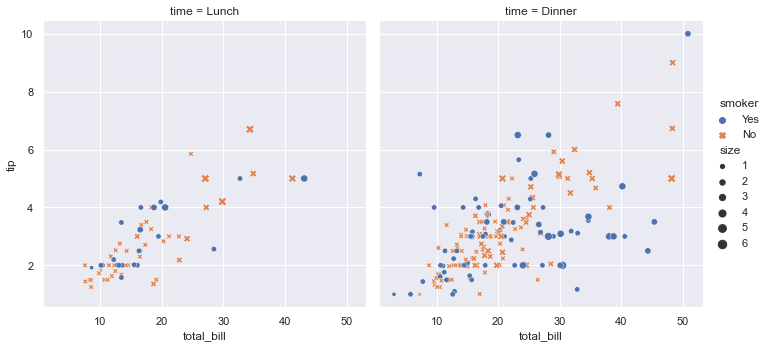

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)